In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('/content/drive/MyDrive/DS/fake_reg.csv')

In [4]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


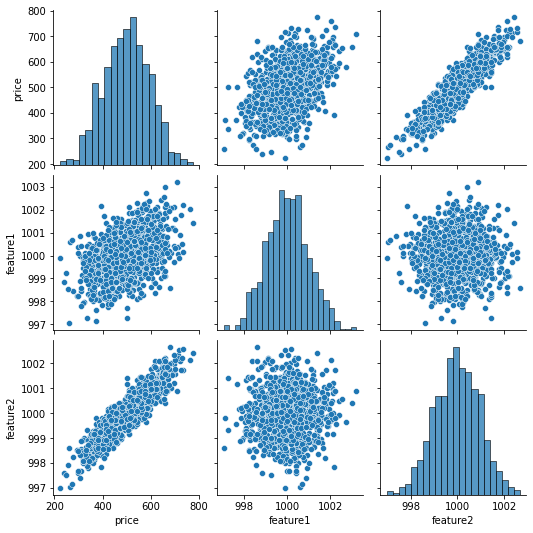

In [5]:
sns.pairplot(df)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X=df.drop('price',axis=1).values;
y=df['price'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler=MinMaxScaler()

In [11]:
scaler.fit(X_train)

MinMaxScaler()

In [12]:
X_train=scaler.transform(X_train)

In [13]:
X_test=scaler.transform(X_test)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
# model=Sequential([Dense(4,
#                         activation='relu'),
#                   Dense(2,activation='relu'),
#                   Dense(1)])

In [16]:
model=Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [17]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 3ms/step - loss: 256716.9375
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256690.6719
Epoch 3/250
22/22 [==============================] - 0s 3ms/step - loss: 256668.1094
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256645.9219
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256623.9375
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256601.9844
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256580.0469
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 256558.1562
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 256536.1406
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 256514.3281
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 256492.4531
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

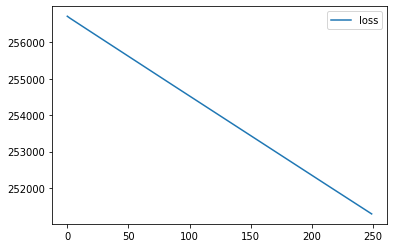

In [18]:
pd.DataFrame(model.history.history).plot()

In [19]:
model.evaluate(X_test,y_test,verbose=0)

253687.96875

In [20]:
model.evaluate(X_train,y_train,verbose=0)

251277.84375

In [21]:
test_preds=model.predict(X_test)

In [22]:
test_predictions=pd.Series(test_preds.reshape(300,))
test_predictions

0      5.505713
1      5.505713
2      5.505713
3      5.505713
4      5.505713
         ...   
295    5.505713
296    5.505713
297    5.505713
298    5.505713
299    5.505713
Length: 300, dtype: float32

In [23]:
pred_df=pd.DataFrame(y_test,columns=['Test True Y'])
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [24]:
pred_df=pd.concat([pred_df,test_predictions],axis=1)
pred_df

,Test True Y,0
0,402.296319,5.505713
1,624.156198,5.505713
2,582.455066,5.505713
3,578.588606,5.505713
4,371.224104,5.505713
...,...,...
295,525.704657,5.505713
296,502.909473,5.505713
297,612.727910,5.505713
298,417.569725,5.505713


In [25]:
pred_df.columns=['Test true y','model predictions']

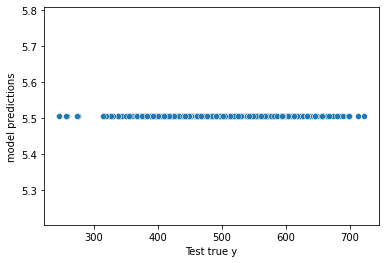

In [26]:
sns.scatterplot(data=pred_df,x='Test true y',y='model predictions')

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
mean_absolute_error(pred_df['Test true y'],pred_df['model predictions'])

494.86962648909065

In [29]:
mean_squared_error(pred_df['Test true y'],pred_df['model predictions'])

253687.97888686482

In [30]:
from tensorflow.keras.models import load_model

In [31]:
# model.save('savedModel.h5')

In [32]:
df=pd.read_csv('/content/drive/MyDrive/DS/kc_house_data.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


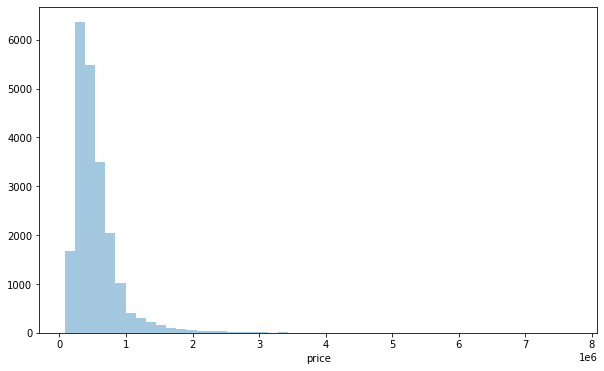

In [33]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'],kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


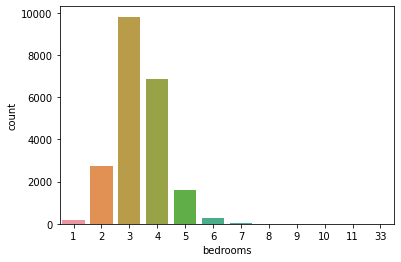

In [34]:
sns.countplot(df['bedrooms'])

In [35]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

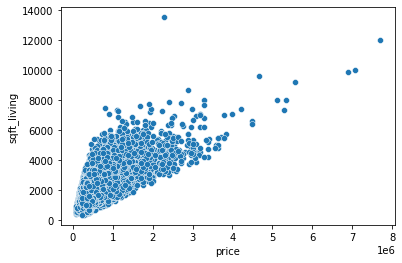

In [36]:
sns.scatterplot(x='price',y='sqft_living',data=df)

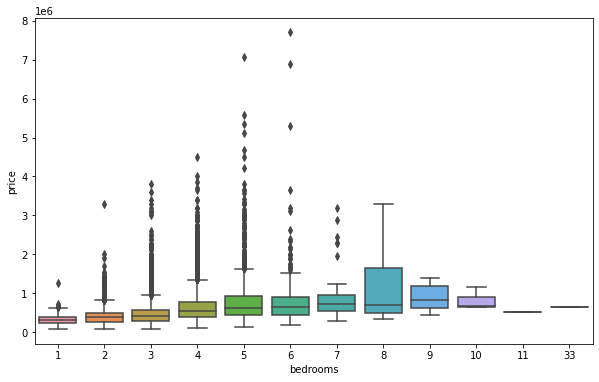

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms',y='price',data=df)

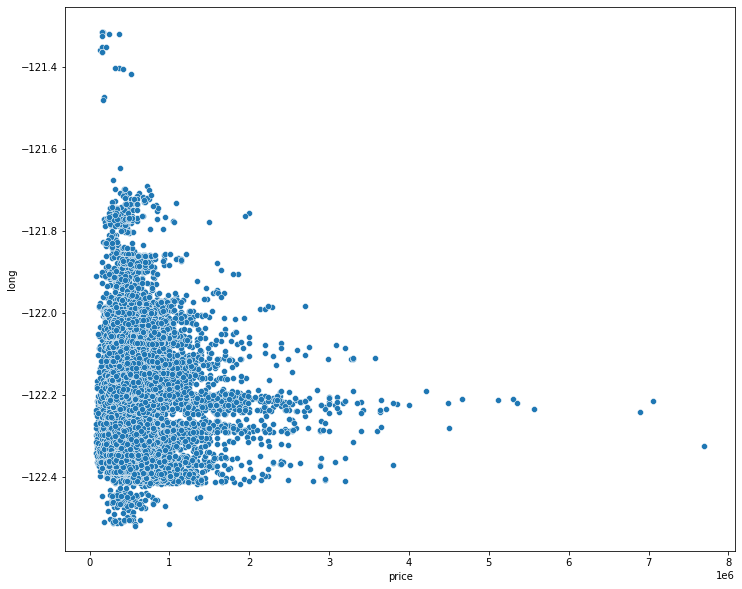

In [38]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='price',y='long',data=df)

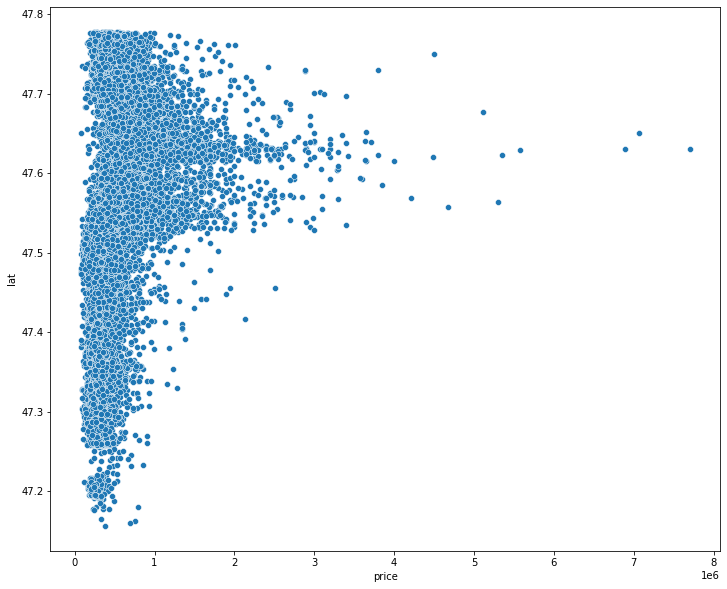

In [39]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='price',y='lat',data=df)

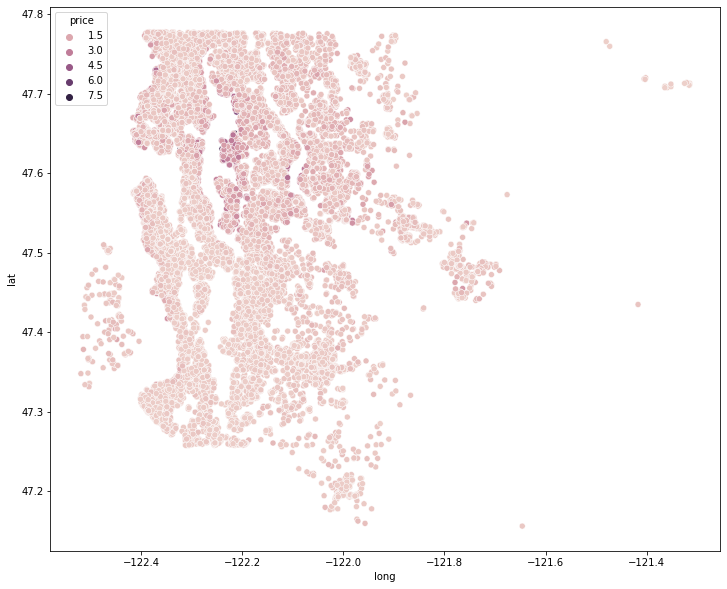

In [40]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='long',y='lat',hue='price',data=df)

In [41]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [42]:
non_top_1_perc=df.sort_values('price',ascending=False).iloc[216:]

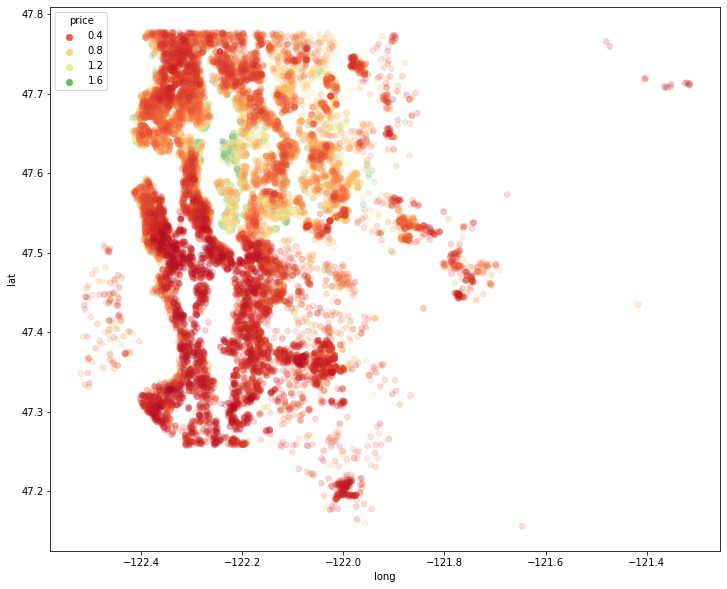

In [43]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='long',y='lat',
                hue='price',data=non_top_1_perc,
                edgecolor=None,alpha=0.2,palette='RdYlGn')

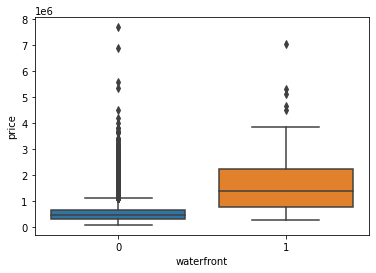

In [44]:
sns.boxplot(x='waterfront',y='price',data=df)

In [45]:
df.drop(['id'],axis=1,inplace=True)

In [46]:
df['date']=pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [47]:
df['year']=df['date'].apply(lambda x:x.year)

In [48]:
df['month']=df['date'].apply(lambda x:x.month)

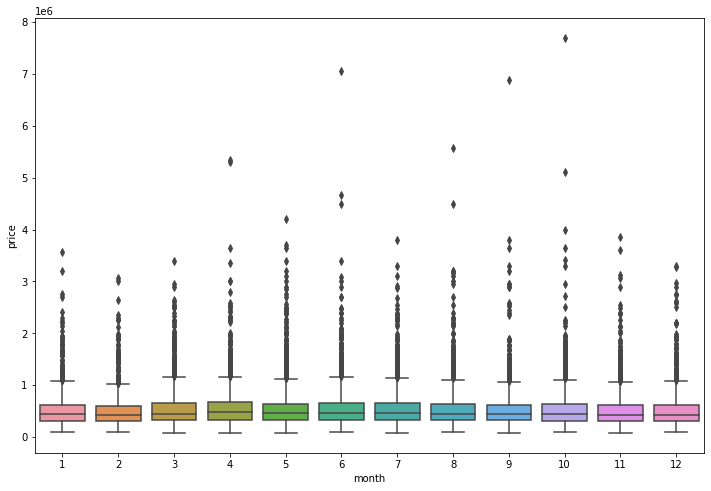

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(x='month',y='price',data=df)

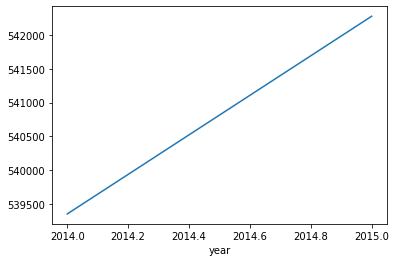

In [50]:
df.groupby('year').mean()['price'].plot()

In [51]:
df.drop(['date'],axis=1,inplace=True)

In [52]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [53]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [54]:
df.drop(['zipcode'],axis=1,inplace=True)

In [55]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [56]:
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [59]:
X=df.drop('price',axis=1).values
y=df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [62]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)

In [63]:
X_test=scaler.transform(X_test)

In [64]:
model=Sequential()

In [67]:
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [68]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 4ms/step - loss: 430246625280.0000 - val_loss: 418961850368.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 430036811776.0000 - val_loss: 418352365568.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 428218417152.0000 - val_loss: 414697914368.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 421165170688.0000 - val_loss: 403400491008.0000
Epoch 5/400
119/119 [==============================] - 0s 4ms/step - loss: 403597361152.0000 - val_loss: 378908901376.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 370580062208.0000 - val_loss: 337653661696.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 320520781824.0000 - val_loss: 280756387840.0000
Epoch 8/400
119/119 [==============================] - 0s 4ms/step - loss: 258081947648.0000 - val_loss: 216704778240.0000
Epoch 9/400
119/

In [71]:
losses=pd.DataFrame(model.history.history)

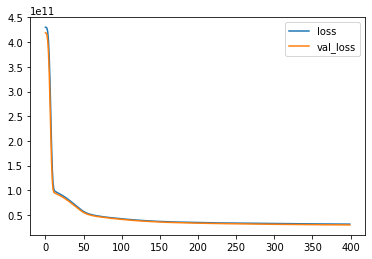

In [72]:
losses.plot()

In [73]:
from sklearn.metrics import explained_variance_score

In [74]:
predictions=model.predict(X_test)

In [77]:
mean_squared_error(y_test,predictions)

29817728305.546143

In [78]:
mean_absolute_error(y_test,predictions)

105449.80552662037

In [79]:
explained_variance_score(y_test,predictions)

0.7751698464424603

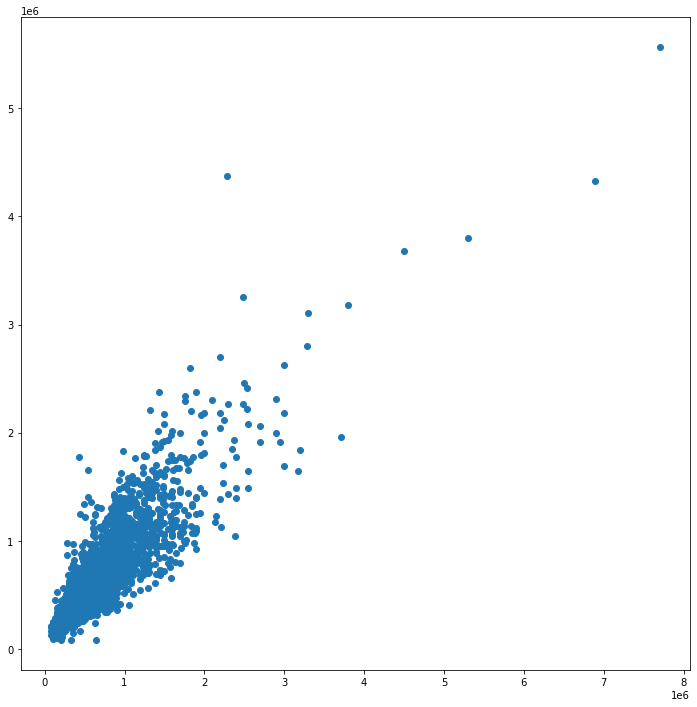

In [80]:
plt.figure(figsize=(12,12))
plt.scatter(y_test,predictions)

In [84]:
single_house=df.drop('price',axis=1).iloc[0]

In [ ]:
single_house.values.reshape(-1,19)

In [87]:
single_house=scaler.transform(single_house.values.reshape(-1,19))

In [88]:
model.predict(single_house)

array([[283930.34]], dtype=float32)

In [89]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
